## How often does President Trump tweet each day?

In [59]:
import altair as alt
import pandas as pd
import psycopg2 as pg
import matplotlib as mpl
import numpy as np
import json
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

### Local url for @realDonaldTrump scraped data: 2012 - Aug. 2019

In [60]:
url = '/Users/mhustiles/Desktop/github/notebooks/trump-tweet-frequency/trump_archive.json'

### Local url for @realDonaldTrump data — updated 9/29/19

### *Download latest tweets using Twint*
`twint -u realdonaldtrump --since 2019-08-13 -o trump_update.json --json`

In [61]:
urladd = '/Users/mhustiles/Desktop/github/notebooks/trump-tweet-frequency/trump_update.json'

In [62]:
src = pd.read_json('/Users/mhustiles/Desktop/github/notebooks/trump-tweet-frequency/all.json')

In [63]:
src.sort_values(by='created_at', ascending=False)

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text
0,2019-09-29 18:16:31,0,1178373003014488064,True,86988,Twitter for iPhone,RT @realDonaldTrump: I AM DRAINING THE SWAMP! ...
1,2019-09-29 18:15:22,26372,1178372711439093760,False,8735,Twitter Media Studio,https://t.co/6S07ep4IdR
2,2019-09-29 18:12:38,26317,1178372025901109248,False,8432,Twitter Media Studio,https://t.co/bzjqfhI6jn
3,2019-09-29 17:47:35,33753,1178365721249759232,False,7987,Twitter for iPhone,Wishing a Happy New Year to all of those celeb...
4,2019-09-29 15:18:44,44361,1178328262537285632,False,15020,Twitter for iPhone,https://t.co/vuFsgolfVO
5,2019-09-29 14:25:34,0,1178314883672215552,True,16689,Twitter for iPhone,RT @realDonaldTrump: Will happen to all of tho...
6,2019-09-29 14:25:22,0,1178314832786968576,True,15877,Twitter for iPhone,RT @realDonaldTrump: https://t.co/w6o2JkaxZ7
7,2019-09-29 14:23:21,0,1178314324575735808,True,6040,Twitter for iPhone,RT @lukepascal2: The real one mark Levin just ...
8,2019-09-29 14:20:12,30650,1178313529700622336,False,8601,Twitter for iPhone,Investigating Corruption is correct! https://t...
9,2019-09-29 14:16:43,0,1178312653732814848,True,4649,Twitter for iPhone,RT @steventatkinson: Mark Levin just mopped th...


### Read data, concatenate, remove duplicate tweets from update

In [64]:
# trumptweets = pd.read_json(url, orient='columns', lines=True)
# trumptweetsnu = pd.read_json(urladd, orient='columns', lines=True)
# trumpall = pd.concat([trumptweets, trumptweetsnu]).drop_duplicates('id').sort_values(['created_at'], ascending=False)

### Clean up data types in scraped data

In [65]:
trumpall['retweet'] = trumpall['retweet'].astype(str)
trumpall['video'] = trumpall['video'].astype(str)
trumpall['user_id'] = trumpall['user_id'].astype(str)
trumpall['user_id'] = trumpall['user_id'].astype(str)
trumpall['id'] = trumpall['id'].astype(str)
trumpall['conversation_id'] = trumpall['conversation_id'].astype(str)

### Add columns parsing dates to dataframe

In [66]:
trumpall['year'] = trumpall['date'].dt.year
trumpall['month'] = trumpall['date'].dt.month
trumpall['day'] = trumpall['date'].dt.day

### Get GMT time

In [67]:
trumpall['hour_gmt'] = trumpall['created_at'].dt.hour

### Clean them up

In [68]:
trumpall['year'] = trumpall['year'].astype(str)
trumpall['month'] = trumpall['month'].astype(str)
trumpall['day'] = trumpall['day'].astype(str)
trumpall['hour_gmt'] = trumpall['hour_gmt'].astype(str)

### What did he average each day in retweets, likes and replies

In [71]:
trump_engagements_day = trumpall.groupby(['date']).mean().round(0).reset_index()

In [72]:
trump_engagements_day

,date,likes_count,replies_count,retweets_count
0,2009-05-04,566.0,104.0,266.0
1,2009-05-08,22.0,8.0,12.0
2,2009-05-12,1016.0,54.0,724.0
3,2009-05-13,15.0,9.0,14.0
4,2009-05-14,23.0,6.0,17.0
5,2009-05-15,7.0,6.0,14.0
6,2009-05-16,48.0,9.0,20.0
7,2009-05-17,59.0,6.0,32.0
8,2009-05-18,101.0,10.0,66.0
9,2009-05-19,16.0,2.0,17.0


### Limit data to when Trump took office

In [73]:
trumpall_prez = trumpall[trumpall.date >= '2017-01-20']

### Limit data to month Trump announced candidacy

In [74]:
trumpall_running = trumpall[trumpall.date >= '2015-06-01']

### Count daily tweets since candidacy, create dataframe with results

In [34]:
trump_tweets_day_candidacy = trumpall_running.groupby(['date']).size()
trump_tweets_day_candidacy_df = pd.DataFrame({'date': trump_tweets_day_candidacy.index, 'count': trump_tweets_day_candidacy.values})

### Count daily tweets since inaguration, create dataframe with results

In [35]:
trump_tweets_day_prez = trumpall_prez.groupby(['date']).size()
trump_tweets_day_prez_df = pd.DataFrame({'date': trump_tweets_day_prez.index, 'count': trump_tweets_day_prez.values})

### Sort table to see top days since candidacy

In [36]:
trump_freq_candidacy = trump_tweets_day_candidacy_df.sort_values(['count'], ascending=False)

In [37]:
trump_freq_candidacy.head(10)

,date,count
132,2015-10-13,95
503,2016-10-19,78
137,2015-10-18,70
110,2015-09-21,67
31,2015-07-02,60
49,2015-07-20,55
348,2016-05-17,54
493,2016-10-09,47
54,2015-07-25,46
148,2015-10-29,46


### Sort table to see top days since inauguration

In [38]:
trump_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [39]:
trump_freq_inauguration.head(10)

,date,count
889,2019-07-11,35
902,2019-07-24,33
890,2019-07-12,28
882,2019-07-04,28
874,2019-06-26,28
916,2019-08-07,25
825,2019-05-08,24
905,2019-07-27,23
922,2019-08-13,23
887,2019-07-09,23


### Read all from today

In [40]:
trump_tweets_today = trumpall[trumpall.date == '2019-08-13']

### Chart it!

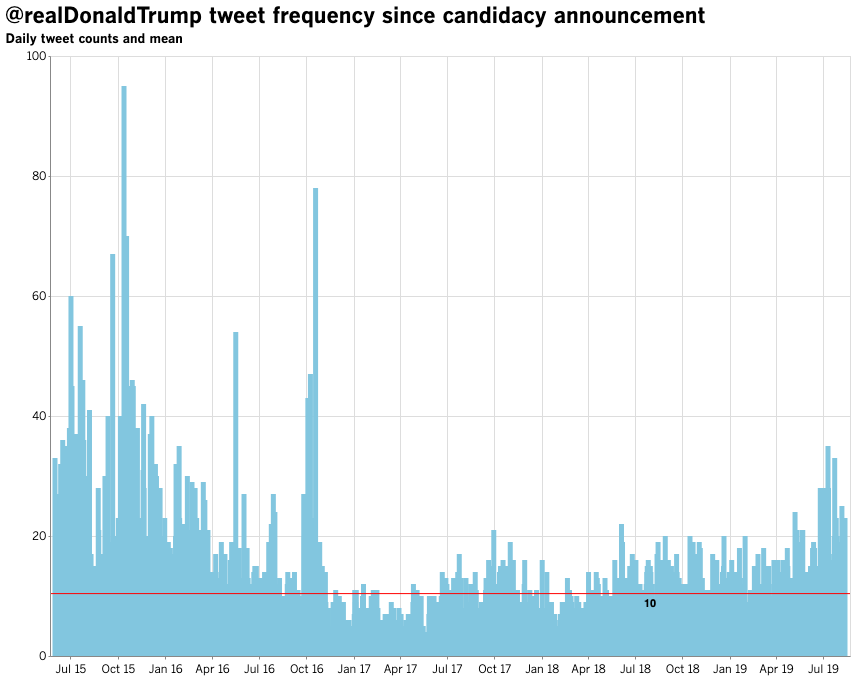

In [41]:
#bars

lines = alt.Chart(trump_tweets_day_candidacy_df, title = '@realDonaldTrump tweet frequency since candidacy announcement').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 100)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_tweets_day_candidacy_df).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=600,width=800)

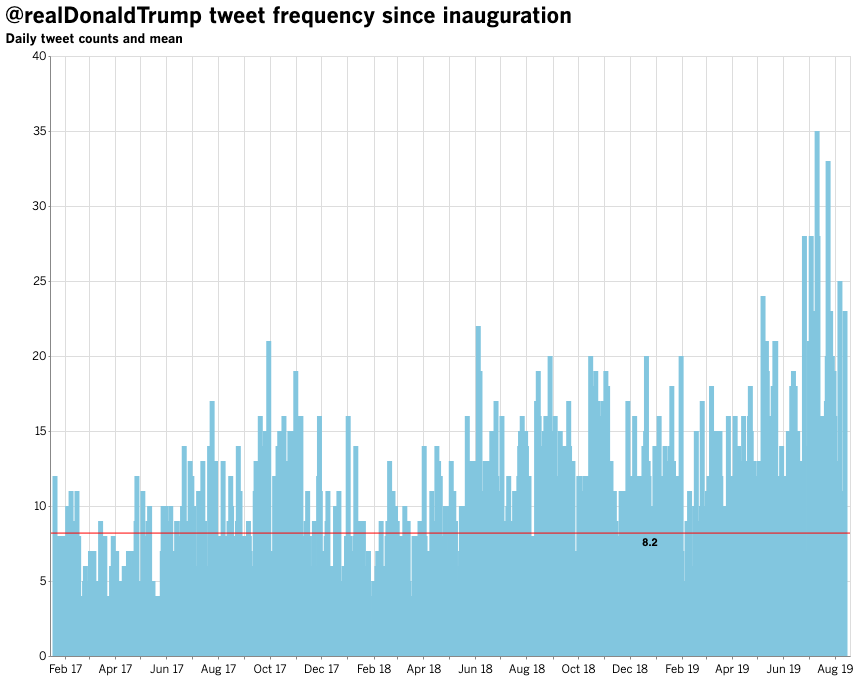

In [42]:
#bars

lines = alt.Chart(trump_freq_inauguration, title = '@realDonaldTrump tweet frequency since inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 40)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=600,width=800)